---
## Bell State
---

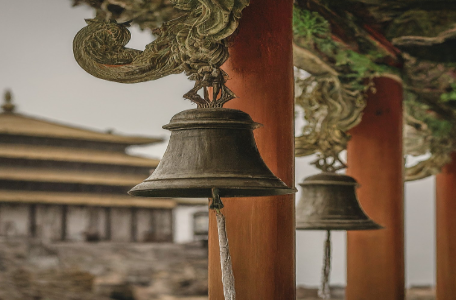

<font color='blue'>source: </font><font color='grey'>  generated by gemini  </font>

**What are Bell States ?** <br>

In the realm of quantum mechanics, a 'Bell state' denotes a unique quantum state in which two qubits are maximally entangled.<br>

* Imagine two dancers performing a perfectly coordinated dance. No matter how they move, their motions are flawlessly synchronized. In the quantum world, these dancers are akin to qubits, and their coordinated dance symbolizes entanglement. If you know the move of one dancer (or the state of one qubit), you automatically know the move of the other.

* When one of the two qubits is measured, it takes on a specific value, and the second qubit is forced to also take on a specific value, as the entangled state collapses.

**Type of Bell states**

There are four specific Bell states:

- $\ket{\phi^+} = \dfrac{1}{\sqrt{2}} ( \ket{00} + \ket{11})$
- $\ket{\phi^-} = \dfrac{1}{\sqrt{2}} ( \ket{00} - \ket{11})$
- $\ket{\psi^+} = \dfrac{1}{\sqrt{2}} ( \ket{01} + \ket{10})$
- $\ket{\psi^-} = \dfrac{1}{\sqrt{2}} ( \ket{01} - \ket{10})$

**Why called as Bell states ?**<br>

You might wonder if there's some obscure reason for the name, perhaps an association with a ringing bell? In reality, the name originates from the world of academia. <br>

The Bell states are named after physicist John Bell. In the 1960s, Bell challenged the conventional understanding of quantum mechanics with "Bell's theorem." This theorem highlighted the 'spooky' nature of quantum mechanics, suggesting that our classical intuition about how objects interact may not hold true at the quantum level.

---

The Bell states can be produced by a very simple quantum circuit consisting of a Hadamard gate and a CNOT gate, as shown below.

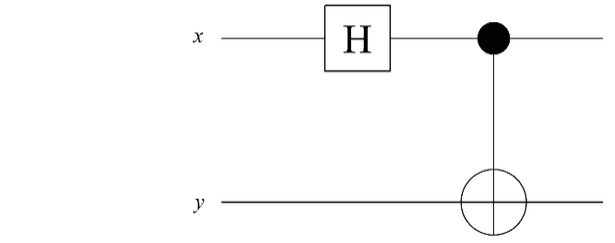

---
### Let dive into pennylane world 


In [11]:
## First import the pennylane and numpy package 

import pennylane as qml
from pennylane import numpy as np

## Define the device as a qubit device with 2 qubits.
# Here shots is the number of times the circuit is run,  100 times in this case.
dev = qml.device('default.qubit', wires=2, shots = 100) 

## Define the quantum circuit
@qml.qnode(dev)

def bell_circuit():

    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])

    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))  ## Return the expectation value of the PauliZ operator for qubit 0 and 1

bell_result = bell_circuit()


## To check is our circuit is a Bell state or not, we need to check the expectation value of the PauliZ operator for qubit 0 and 1

# if (np.all(bell_result[0] == bell_result[1])):
#     print("The circuit is a Bell state")

####  <b><font color='red'> Exercise 2.1</font> </b> :

<style>
    .blue {
        background-color: #edf6ff;
    }
</style>

<div class="blue">

#### Task 1:<br>

Create a circuit for $\ket{\psi^+} = \dfrac{1}{\sqrt{2}} ( \ket{01} + \ket{10})$ and show  the circuit as output

</div>


In [12]:
import pennylane as qml
from pennylane import numpy as np

qubits = 4

dev = qml.device("default.qubit", wires=qubits, shots=100)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.broadcast(unitary=qml.CNOT, pattern="chain", wires=range(qubits))
    return [qml.sample(qml.PauliZ(i)) for i in range(qubits)]

result = circuit()
isBell = [np.all(result[i] == result[i+1]) for i in range(qubits-1)]

print(isBell)

[tensor(True, requires_grad=True), tensor(True, requires_grad=True), tensor(True, requires_grad=True)]
